In [15]:
#Step 1: Camera Calibration
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# This assumes chessboard is 9x6 (9 corners horizontally, 6 vertically)
nx = 9  # number of inside corners in x
ny = 6  # number of inside corners in y

# Arrays to store object points and image points from all images
objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane
img_shape = None  # To store image shape

# Prepare object points for a 9x6 grid (chessboard)
objp = np.zeros((ny*nx, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

In [12]:
# A list of calibration images
images = glob.glob('Calibration/*.jpg')
# Print the list of image file paths
if images:
    print(f"Found {len(images)} images:")
    for img_path in images:
        print(img_path)
else:
    print("No images found in the specified directory.")

Found 20 images:
Calibration\calibration1.jpg
Calibration\calibration10.jpg
Calibration\calibration11.jpg
Calibration\calibration12.jpg
Calibration\calibration13.jpg
Calibration\calibration14.jpg
Calibration\calibration15.jpg
Calibration\calibration16.jpg
Calibration\calibration17.jpg
Calibration\calibration18.jpg
Calibration\calibration19.jpg
Calibration\calibration2.jpg
Calibration\calibration20.jpg
Calibration\calibration3.jpg
Calibration\calibration4.jpg
Calibration\calibration5.jpg
Calibration\calibration6.jpg
Calibration\calibration7.jpg
Calibration\calibration8.jpg
Calibration\calibration9.jpg


Chessboard corners not found in Calibration\calibration1.jpg


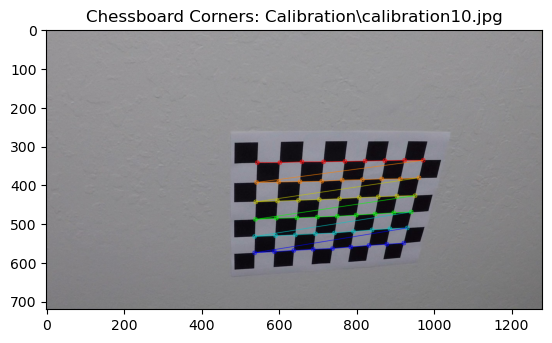

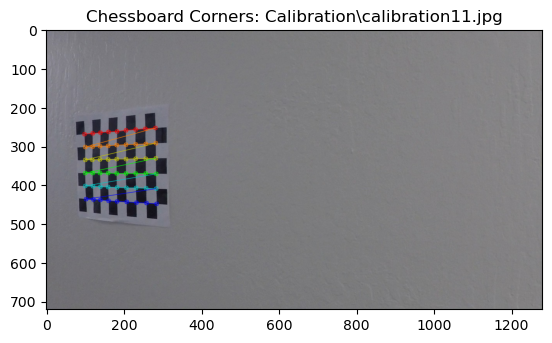

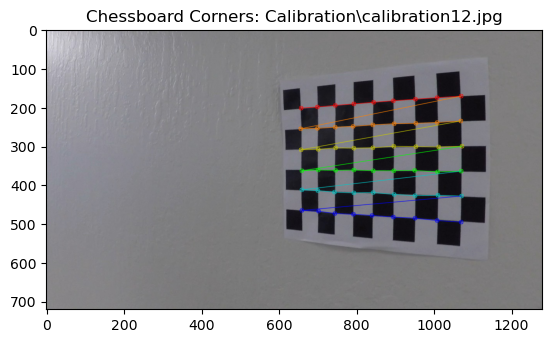

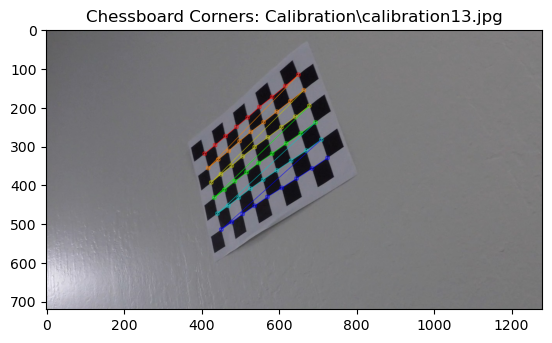

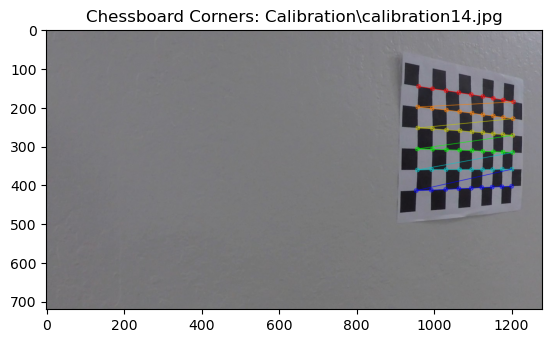

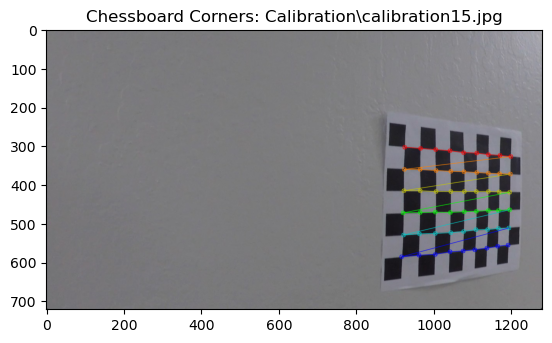

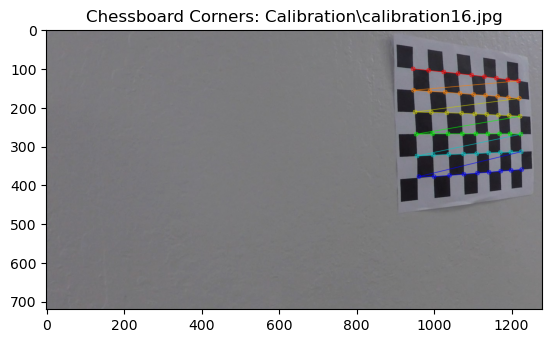

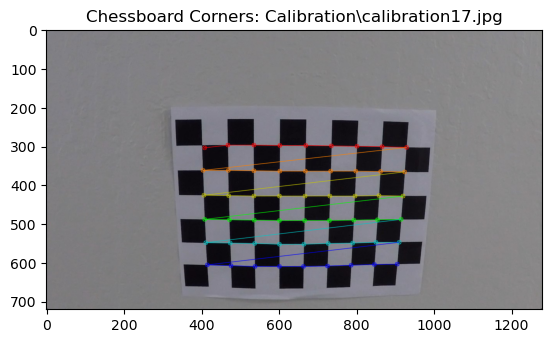

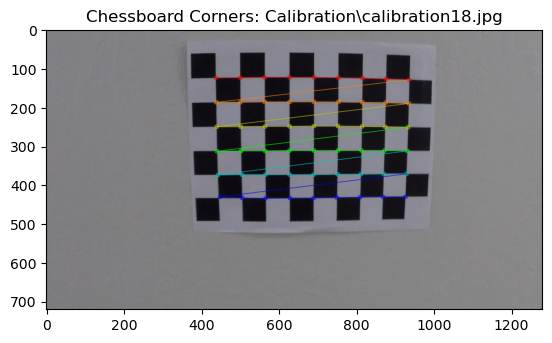

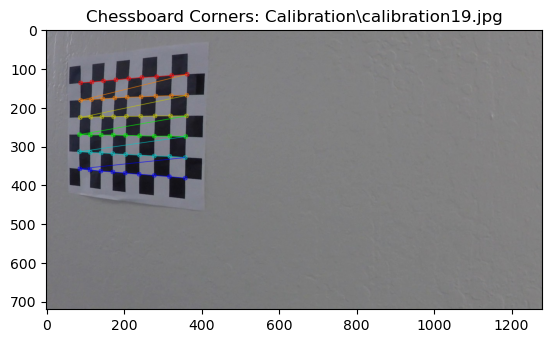

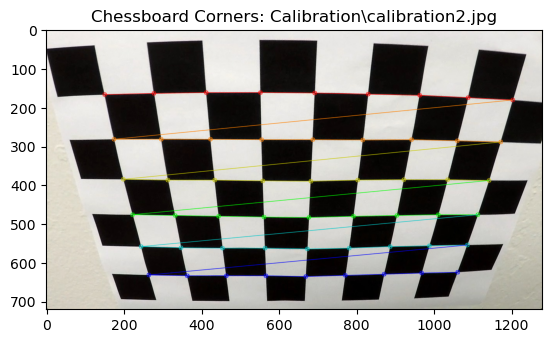

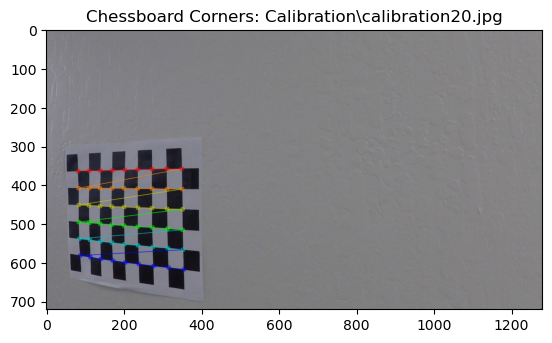

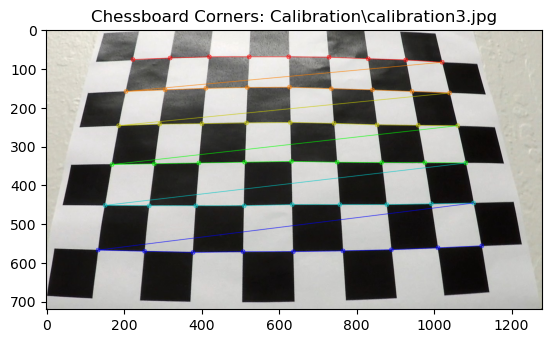

Chessboard corners not found in Calibration\calibration4.jpg
Chessboard corners not found in Calibration\calibration5.jpg


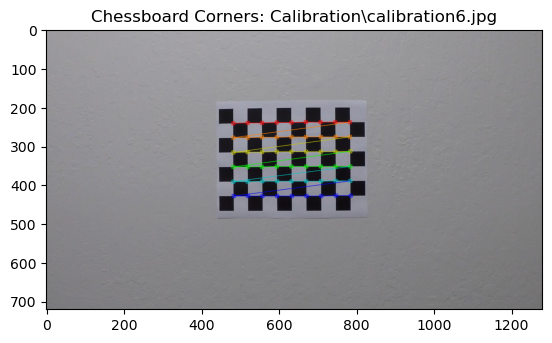

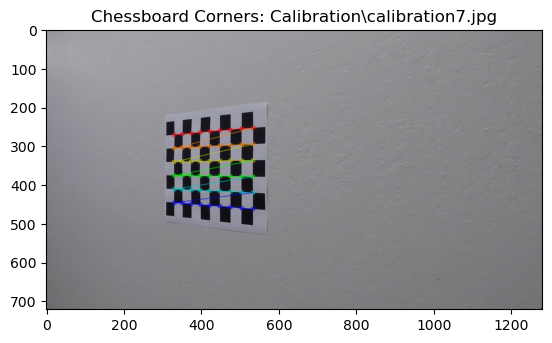

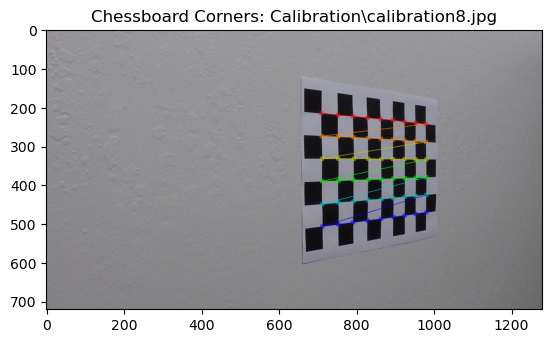

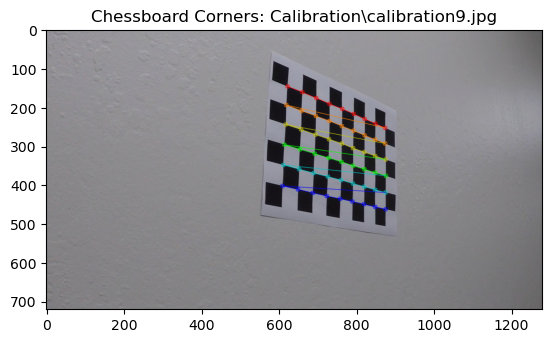

Camera calibration successful and data saved.


In [14]:
for fname in images:
    img = cv2.imread(fname)
    # Check if the image was read correctly
    if img is None:
        print(f"Failed to load image {fname}")
        continue
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Store the shape of the image
    if img_shape is None:
        img_shape = gray.shape[::-1]

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # Draw the corners on the image
        img_with_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
         # Display the image using matplotlib
        
        plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
        plt.title(f'Chessboard Corners: {fname}')
        plt.show()
    else:
        print(f"Chessboard corners not found in {fname}")

        # Ensure that we have valid image points before calibrating
if objpoints and imgpoints:
    # Calibrate the camera
    ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape, None, None)

    # Save the calibration result for later use
    np.savez('calibration_data.npz', camera_matrix=camera_matrix, dist_coeffs=dist_coeffs)
    print("Camera calibration successful and data saved.")
else:
    print("No valid chessboard corners found, calibration failed.")
    
# Calibrate the camera
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Save the calibration result for later use
np.savez('calibration_data.npz', camera_matrix=camera_matrix, dist_coeffs=dist_coeffs)